In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image  # To display images in jupyter notebook
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [2]:
transaction_df = pd.read_excel(io='transaction_data.xlsx')
customer_df = pd.read_excel(io='purchase_behaviour.xlsx')

# Analyse Transaction Data

In [3]:
print(transaction_df.shape)
transaction_df.head()

(264836, 8)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
# Check for any null value in 'DATE'

any(transaction_df['DATE'].isna())

False

In [5]:
# Bring date to their propper format

from datetime import date, timedelta

start_date = date(1899, 12, 30)  # excel start date

new_dates = [start_date + timedelta(days=days) for days in transaction_df['DATE']]
transaction_df['DATE'] = new_dates

In [6]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
# Seperate Weight from the product name

PROD_WEIGHT = [product[len(product)-4: len(product)-1] for product in transaction_df['PROD_NAME']]
transaction_df['PROD_WEIGHT(g)'] = PROD_WEIGHT 

In [8]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT(g)
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [9]:
transaction_df['PROD_WEIGHT(g)'].unique()

array(['175', '170', '150', '300', '330', '210', '270', '220', '125',
       '110', '134', '380', '180', '165', 'Sal', '250', '200', '160',
       '190', ' 90', ' 70'], dtype=object)

### Here we have 'Sal' in unique value... Now we will deal with it.

In [10]:
# Check which Product gives us 'Sal' in PROD_WEIGHT(g)

f_mask = (transaction_df['PROD_WEIGHT(g)'] == 'Sal')
t_d = transaction_df[f_mask]
t_d.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT(g)
65,2019-05-20,83,83008,82099,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Sal
153,2019-05-17,208,208139,206906,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Sal
174,2018-08-20,237,237227,241132,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Sal
177,2019-05-17,243,243070,246706,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Sal
348,2018-10-26,7,7077,6604,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Sal


In [11]:
t_d['PROD_NAME'] .unique()

array(['Kettle 135g Swt Pot Sea Salt'], dtype=object)

### We see that name is 'Kettle 135g Swt Pot Sea'  is not fomatted like other Product names.

In [12]:
# <<--- Replace all 'Kettle 135g Swt Pot Sea' with 'Kettle Swt Pot Sea' from PROD_NAME column --->>

transaction_df['PROD_NAME'].replace(to_replace='Kettle 135g Swt Pot Sea', value='Kettle Swt Pot Sea', inplace=True)

# <<--- Replace all 'Sal' with 135 from PROD_WEIGHT(g) column --->>

transaction_df['PROD_WEIGHT(g)'].replace(to_replace='Sal', value=135, inplace=True)

In [13]:
# Seperate Name from the product name

PROD_NAME = [product[: len(product)-4].strip() for product in transaction_df['PROD_NAME']]
transaction_df['PROD_NAME'] = PROD_NAME 

In [14]:
# Merge both the data frames 

df = pd.merge(left=transaction_df, right=customer_df, on='LYLTY_CARD_NBR')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT(g),LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,MIDAGE SINGLES/COUPLES,Budget


In [15]:
# Convert PROD_WEIGHT(g) from string datatype to interger

df['PROD_WEIGHT(g)'] = df['PROD_WEIGHT(g)'].astype(int)

In [16]:
# Convert DATE from object to datetime

df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 11 columns):
DATE                264836 non-null datetime64[ns]
STORE_NBR           264836 non-null int64
LYLTY_CARD_NBR      264836 non-null int64
TXN_ID              264836 non-null int64
PROD_NBR            264836 non-null int64
PROD_NAME           264836 non-null object
PROD_QTY            264836 non-null int64
TOT_SALES           264836 non-null float64
PROD_WEIGHT(g)      264836 non-null int32
LIFESTAGE           264836 non-null object
PREMIUM_CUSTOMER    264836 non-null object
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(3)
memory usage: 23.2+ MB


### There is no Null value in any column/feature

In [18]:
df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_WEIGHT(g)
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200,182.427004
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226,64.327196
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000,150.000000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000,170.000000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000,175.000000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


### From above metric we see that TOT_SALES have standard deviation more than 3, and acceptable scale is from -3 to 3 so there might be outliars.

Skewness of Total Sales: 68.56963132181272


[Text(0.5, 0, 'Total Sales')]

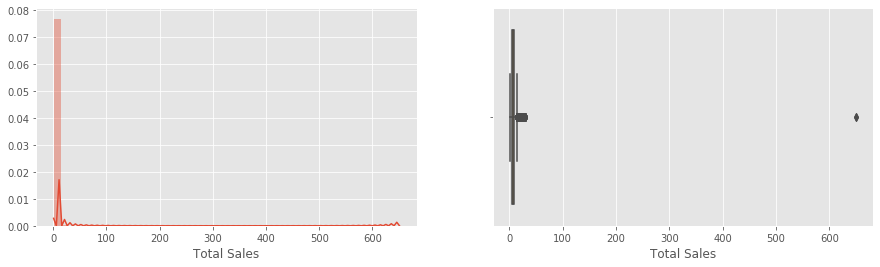

In [19]:
# Checking for outliars in TOT_SALES by histogram and Boxplot

fig1, ax1 =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

total_sales = df['TOT_SALES']

sns.distplot(a=total_sales, kde=True, ax=ax1[0], axlabel='Total Sales')  # Histogram
print(f"Skewness of Total Sales: {df['TOT_SALES'].skew()}")

sns.boxplot(x=total_sales, color='orange', ax=ax1[1])  # Boxplot
ax1[1].set(xlabel="Total Sales")      

### There are outliars above 600.

In [20]:
df[df['TOT_SALES'] > 600]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT(g),LIFESTAGE,PREMIUM_CUSTOMER
71456,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380,OLDER FAMILIES,Premium
71457,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380,OLDER FAMILIES,Premium


### As you see there are tow extremely larege outliars, These both outliars are by the same person having LYLTY_CARD_NBR as 226000. This person buy 200 packets of 'Dorito Corn Chp Supreme' of weight 380g each both the times. Most importantly these 2 transactions are not frequent, as he/she buys these 200 packets 2 times in timespan of 2 years. So these can be regarded as outliars. Therefore we will remove these 2 transactions.

In [21]:
df = df[df['TOT_SALES'] < 600]  # Remove the outliars

Skewness of Total Sales: 0.3131546350495999


[Text(0.5, 0, 'Total Sales')]

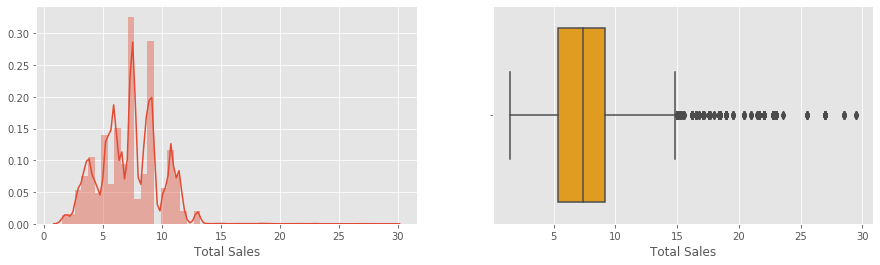

In [22]:
# Recheck outliars

fig1, ax1 =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

total_sales = df['TOT_SALES']

sns.distplot(a=total_sales, kde=True, ax=ax1[0], axlabel='Total Sales')  # Histogram
print(f"Skewness of Total Sales: {df['TOT_SALES'].skew()}")

sns.boxplot(x=total_sales, color='orange', ax=ax1[1])  # Boxplot
ax1[1].set(xlabel="Total Sales")      

### You see still we got outliars, Lets figure out these outliars.

In [23]:
# Check the occurances of product quantity's in these outliars.

outliars = df[df['TOT_SALES'] > 15]

outliars['PROD_QTY'].value_counts()

5    288
4    181
3     69
Name: PROD_QTY, dtype: int64

In [24]:
outliars['LIFESTAGE'].value_counts()

OLDER SINGLES/COUPLES     119
OLDER FAMILIES            114
YOUNG FAMILIES             99
RETIREES                   91
MIDAGE SINGLES/COUPLES     53
YOUNG SINGLES/COUPLES      53
NEW FAMILIES                9
Name: LIFESTAGE, dtype: int64

### You see quantities we get are in range 3 to 5, and we see that maximum people in this group are who are Old/Retirees or Old/Young families. Therefore it is not a surprise that a Family person buys 3 or 4 packet of chips. So these outliars can be accepted.

In [25]:
# Save Merged DataFrame

df.to_excel(excel_writer='Merged_data_frame.xlsx', sheet_name='Sheet1')

In [26]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT(g),LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,MIDAGE SINGLES/COUPLES,Budget


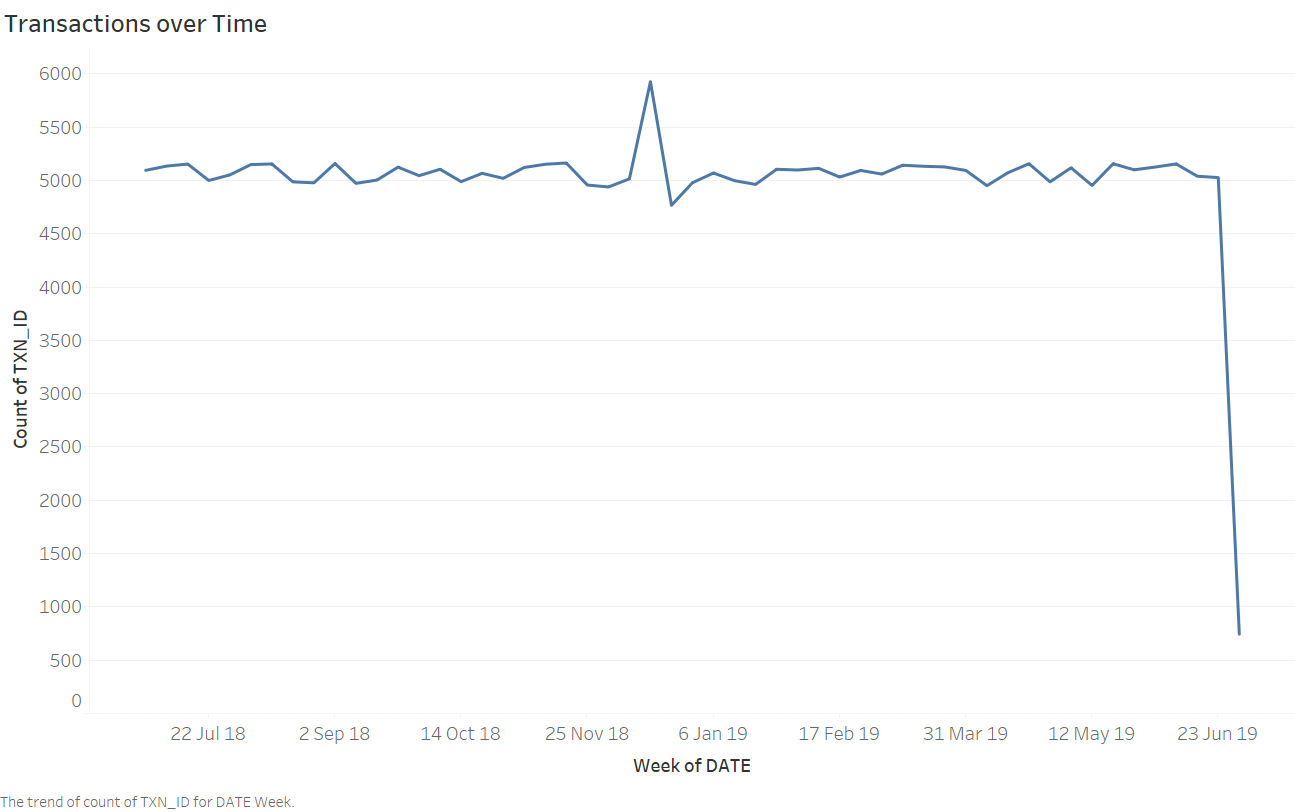

In [27]:
# Transactions over time (Week)

Image('image1.png')

### Here we assume that year starts from July 2018 and ends at June 2019, rather than Jan 2018 to Dec 2019 (atleast in India) .

### Here we see that Transactions are almost same all over the year, but there is 1 high Spike.

In [28]:
# <<<--- High Spike --->>

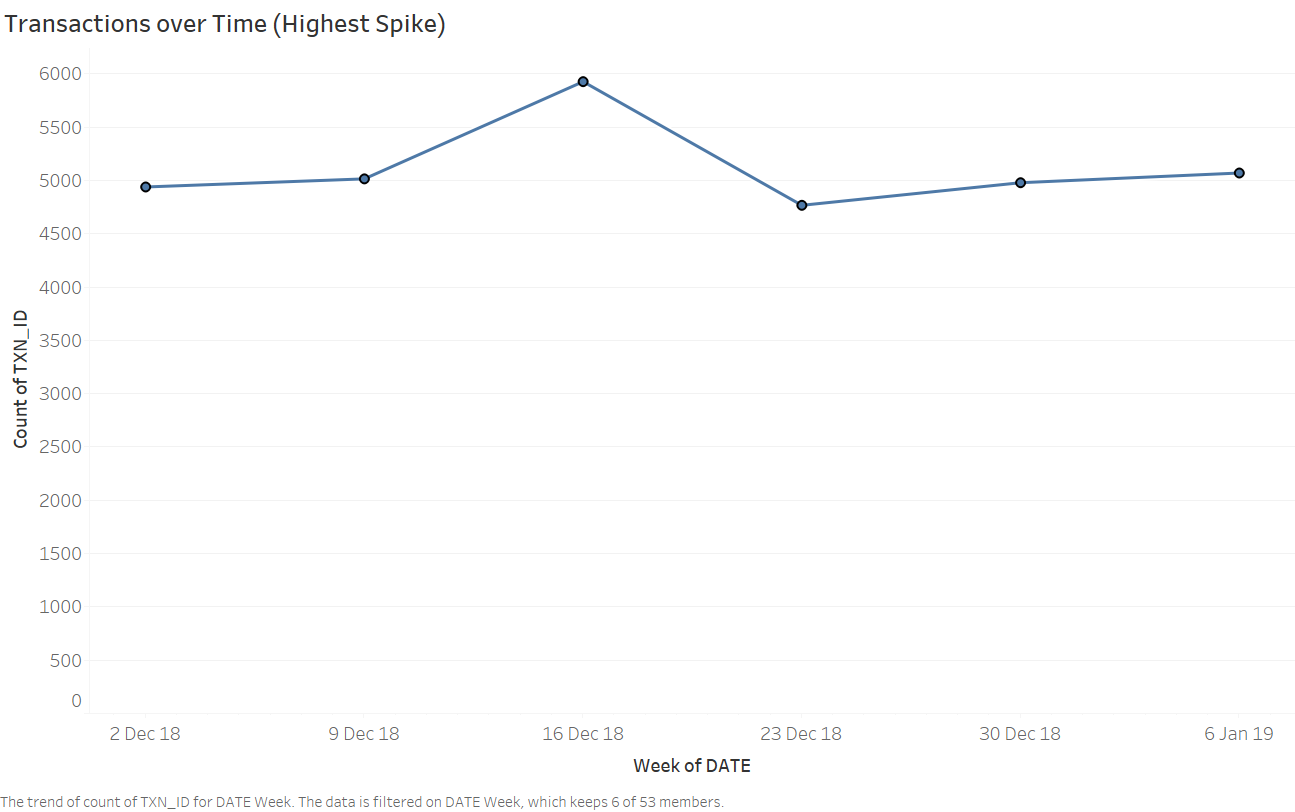

In [29]:
Image('image2.png')

In [30]:
# Here we analyse customer from '9 Dec 2018' to '23 Dec 2018'

from datetime import datetime

filter_mask =  (df['DATE'] >= '2018-12-9') & (df['DATE'] <= '2018-12-30')
temp_df1 = df[filter_mask]
temp_df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT(g),LIFESTAGE,PREMIUM_CUSTOMER
10,2018-12-12,4,4074,2980,4,Dorito Corn Chp Supreme,2,13.0,380,MIDAGE SINGLES/COUPLES,Budget
41,2018-12-28,9,9208,8633,24,Grain Waves Sweet Chilli,2,7.2,210,MIDAGE SINGLES/COUPLES,Budget
43,2018-12-18,13,13213,12448,53,RRD Sweet Chilli & Sour Cream,2,6.0,165,MIDAGE SINGLES/COUPLES,Budget
50,2018-12-26,19,19272,16684,59,Old El Paso Salsa Dip Tomato Med,1,5.1,300,MIDAGE SINGLES/COUPLES,Budget
64,2018-12-20,23,23067,19159,68,Pringles Chicken Salt Crips,2,7.4,134,MIDAGE SINGLES/COUPLES,Budget


### You see that great spike in the graph is between '9 dec 2018' to '24 dec 2018', So now we will analyse all date between '15 dec 2018'  to '30 dec 2018'.

In [31]:
# Count of transctions from 2018-12-09  to 2018-12-30

temp_df1.groupby(by='DATE').count()['TXN_ID']

DATE
2018-12-09    697
2018-12-10    715
2018-12-11    750
2018-12-12    664
2018-12-13    720
2018-12-14    744
2018-12-15    725
2018-12-16    761
2018-12-17    786
2018-12-18    862
2018-12-19    906
2018-12-20    855
2018-12-21    842
2018-12-22    915
2018-12-23    917
2018-12-24    939
2018-12-26    753
2018-12-27    732
2018-12-28    720
2018-12-29    706
2018-12-30    747
Name: TXN_ID, dtype: int64

### Results:- 

#### 1. There is no transactions for date 25 dec 2018 (maybe shop's will be closed on Christmas).

#### 2. The transactions keep on increasing (ie.more than average ie. from 700's to 900's) till date 24 dec 2018 (ie. a day before Christmas) and then after Christmas (ie. 25 dec 2018), the transactions comes to average (ie. 700's).

### Conclusion:- 
#### Highest Chips are sold near Christmas.

In [32]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT(g),LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,MIDAGE SINGLES/COUPLES,Budget


## Lets Check weather pack size matters or not.

In [33]:
# <<--- Number of transactions per weight --->>

In [34]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT(g),LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,MIDAGE SINGLES/COUPLES,Budget


In [35]:
temp3 = df['PROD_WEIGHT(g)'].value_counts(normalize=True)
x = temp3.index
y = temp3

data = list(zip(x, y))
t_df = pd.DataFrame(data=data, index=range(0, len(x)), columns=['Product_Weight', 'Count_Percentage_TXN_ID(%)'])

t_df['Count_Percentage_TXN_ID(%)'] = [round(per * 100, 1) for per in t_df['Count_Percentage_TXN_ID(%)']]
t_df.sort_values('Count_Percentage_TXN_ID(%)', ascending=False, inplace=True)
t_df['Product_Weight'] = [str(weight) for weight in t_df['Product_Weight']]

t_df.to_excel(excel_writer='ProductWeight_TransactionCount.xlsx', sheet_name='Sheet1')

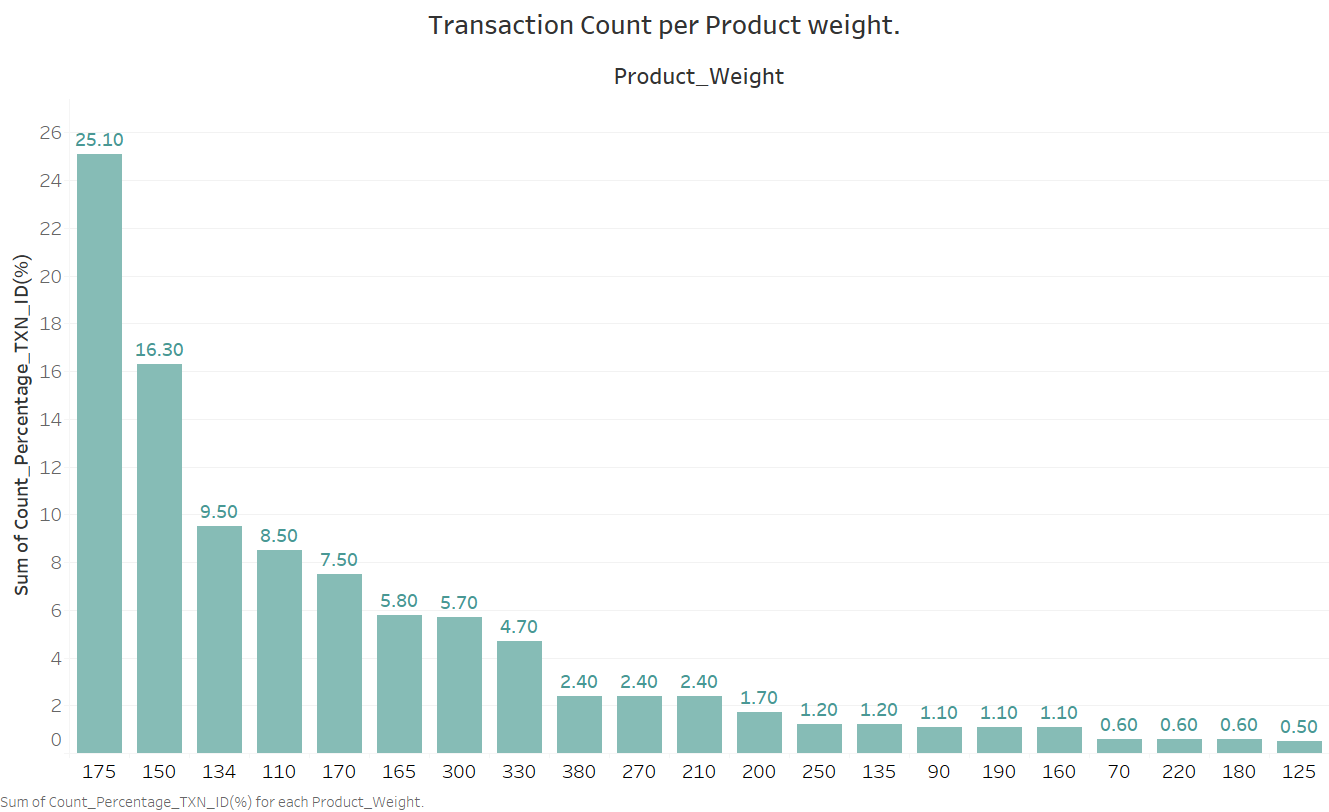

In [36]:
# <<--- Number of Transaction per Product Weight --->>

Image('image3.png')

###  Conclusion :- Most packets that are sold are of average weight 175g, 150g, 134g, 110g, 170g.   

# Analysis on Customer Segment

In [37]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT(g),LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,MIDAGE SINGLES/COUPLES,Budget


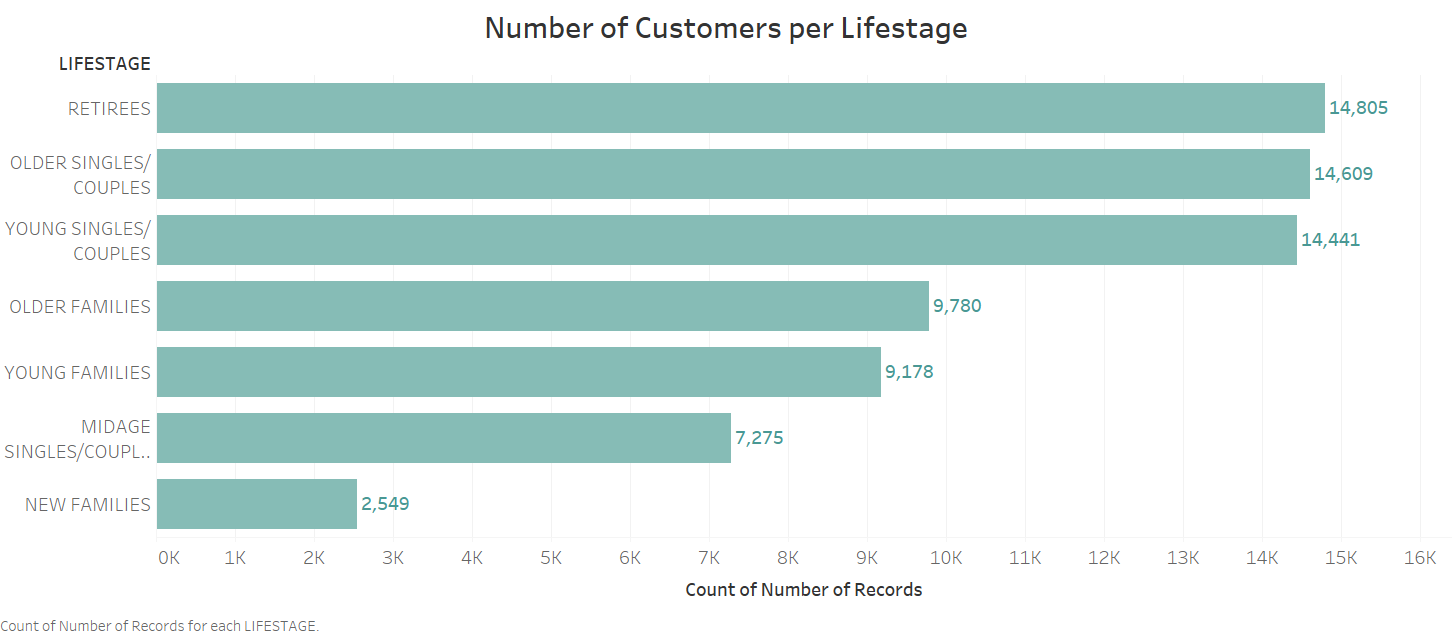

In [38]:
# <<<--- Type of Customer's (acc. to LIFESTAGE) that are more interested in buying Chips --->>>

Image('image4.png')

### Conclusion :-  Customers who mostly buy chips Retirees and single/couples.

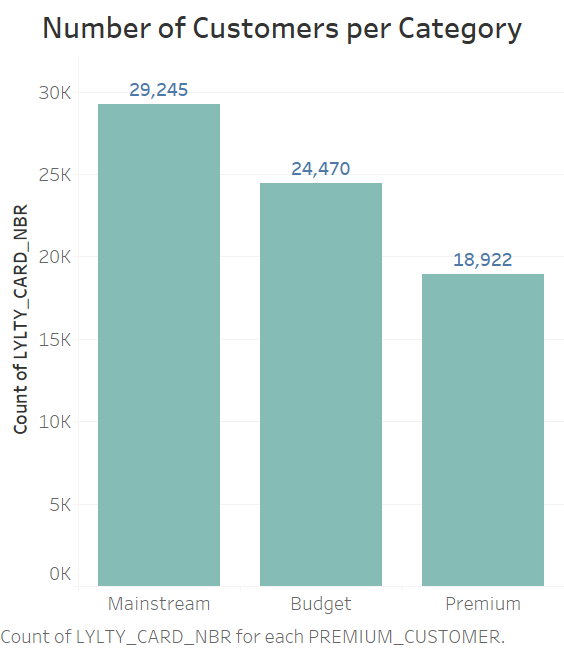

In [39]:
# <<<--- Type of Customer's (acc. to Category) that are more interested in buying Chips --->>>

Image('image5.png')

### Conlcusion :- People with category mainstream more likely to buy chips followed by the budget category and premium customers less likely to buy chips!

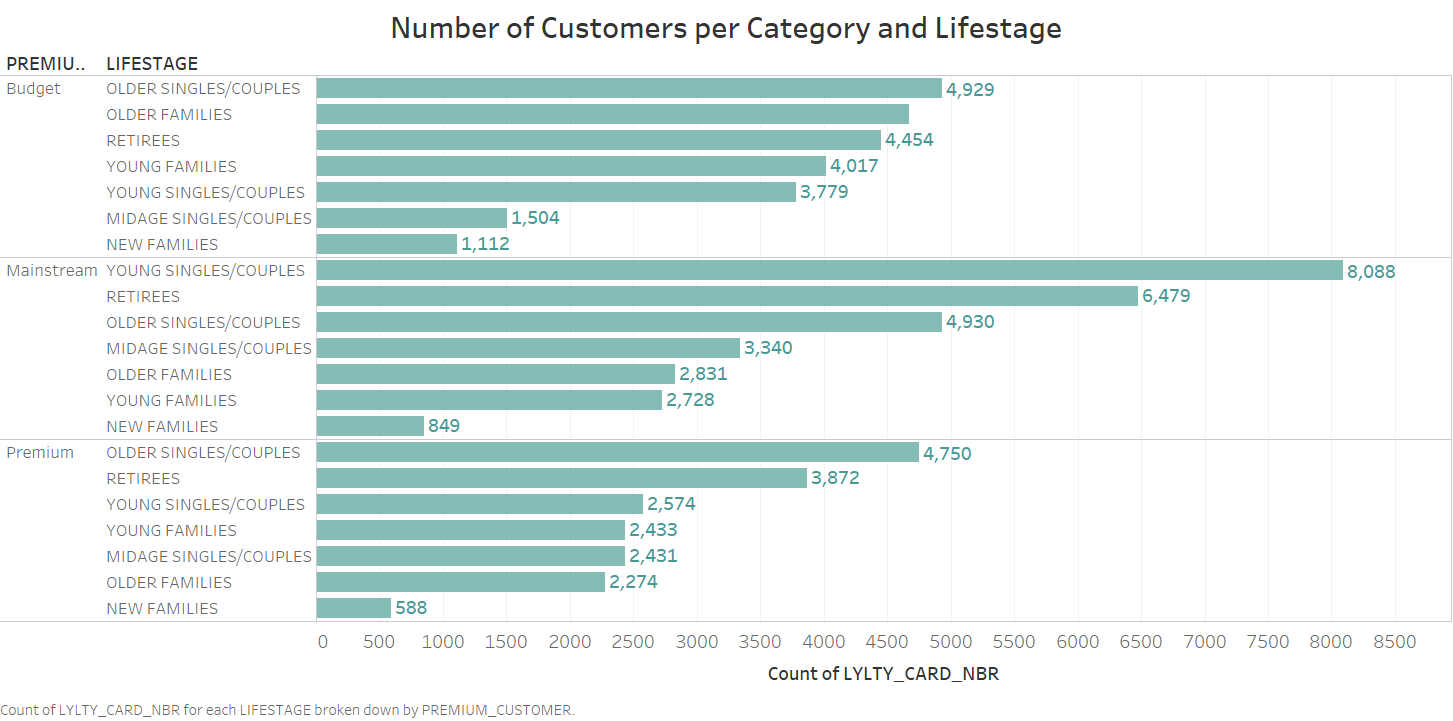

In [40]:
# <<<---- Customer counts on basis category and subcategory ---->>>

Image('image6.png')

## Results :-

### Here we have 3 main categories :-
1. Budget
2. Mainstream
3. Premium

### All three categories have further 7 further categories :-
1. OLDER FAMILIES
2. YOUNG FAMILIES
3. NEW FAMILIES
4. OLDER SINGLE/COUPLES
5. YOUNG SINGLE/COUPLES
6. MIDAGE SINGLE/COUPLES
7. RETIREES

#### Result1 (Budget) :-  
In Budget category everyone love to buy chips except mainstream single/couples.

#### Result2 (Mainstream) :-  
In Mainstream Young/Single couples and families and retirees more likely to buy chips.


#### Result3 (Premium) :-  
In Premium category Older Single/Couples and retirees more likely to buy Chips.

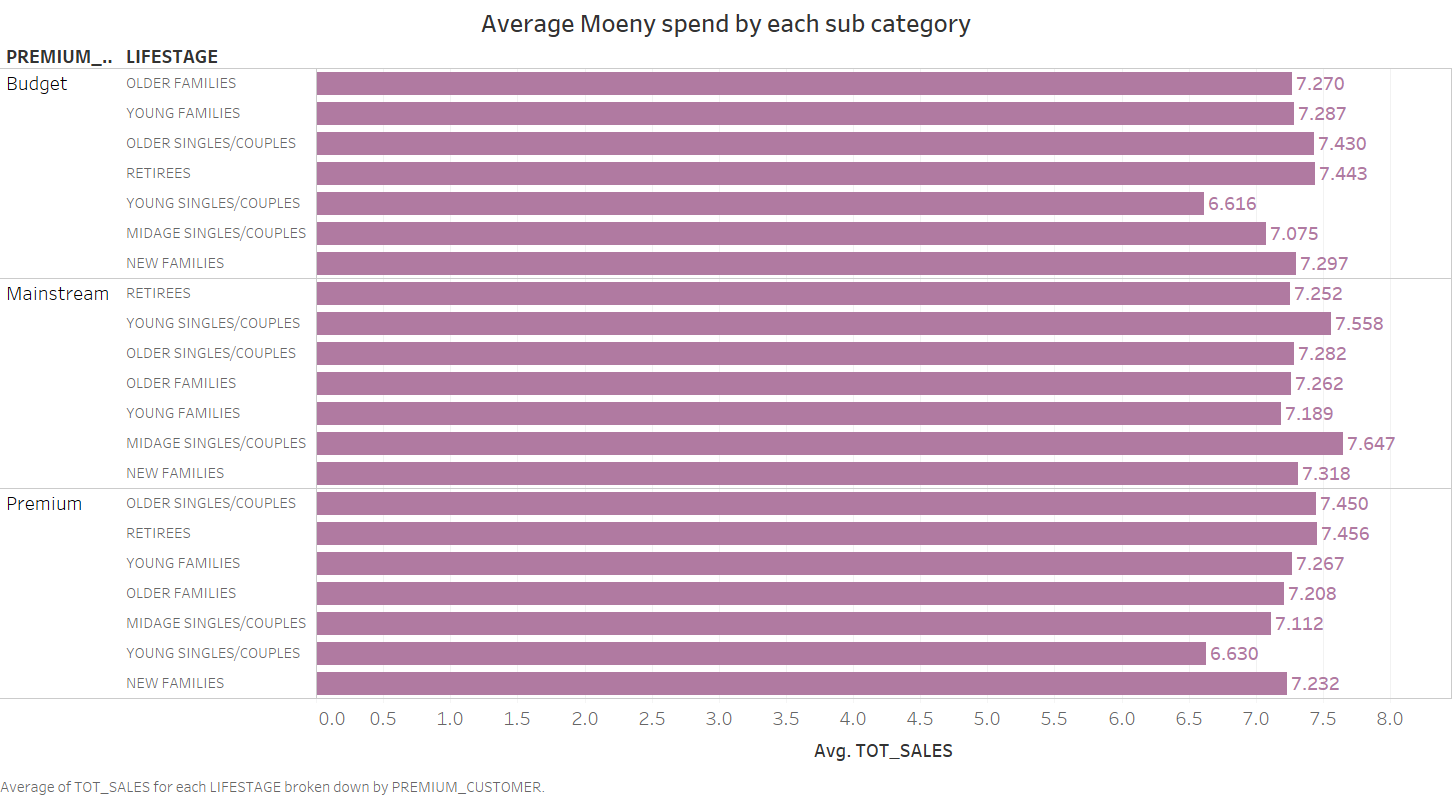

In [41]:
# <<<---- Average Moeny spend by each sub category ---->>>

Image('image7.png')

## Conclusion :- Here we can clearly see  that Customer's in every Lifestage in every Category are spending same money on average (ie. about 7 to 7.5 USD)  

In [42]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT(g),LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,MIDAGE SINGLES/COUPLES,Budget


In [43]:
# <<<--- Most sold Quantity --->>>

In [44]:
temp_df = df.groupby(by='PROD_QTY').count()
temp_df.reset_index(inplace=True)
temp_df.rename(columns={'TXN_ID': 'PROD_QTY_COUNT'}, inplace=True)
temp_df = temp_df.loc[:, ['PROD_QTY', 'PROD_QTY_COUNT']]
temp_df['PROD_QTY'] = temp_df['PROD_QTY'].astype(str)
temp_df.to_excel(excel_writer='Product_quantity_counts.xlsx', sheet_name='Sheet1')

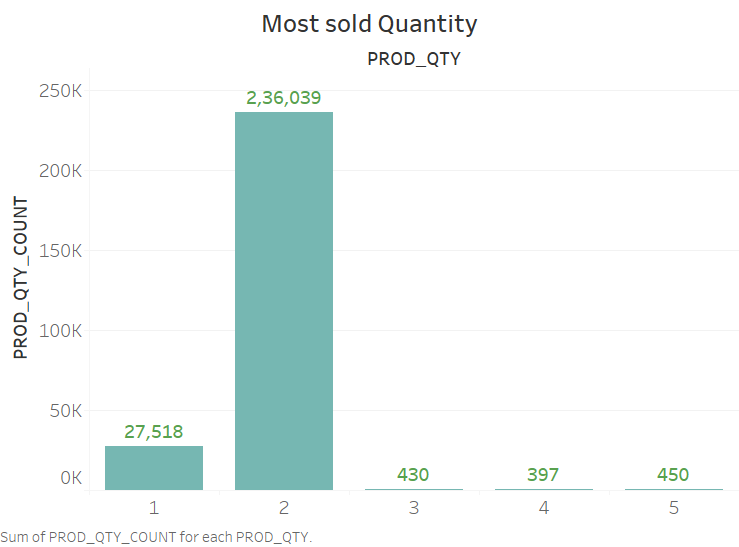

In [45]:
Image('image8.png')

## Conclusion :- Here we clearly see that people mostly love to buy 2 packetes at a time. 

In [46]:
# <<<---- Most sold quantity by LIFESTATGE ---->>>

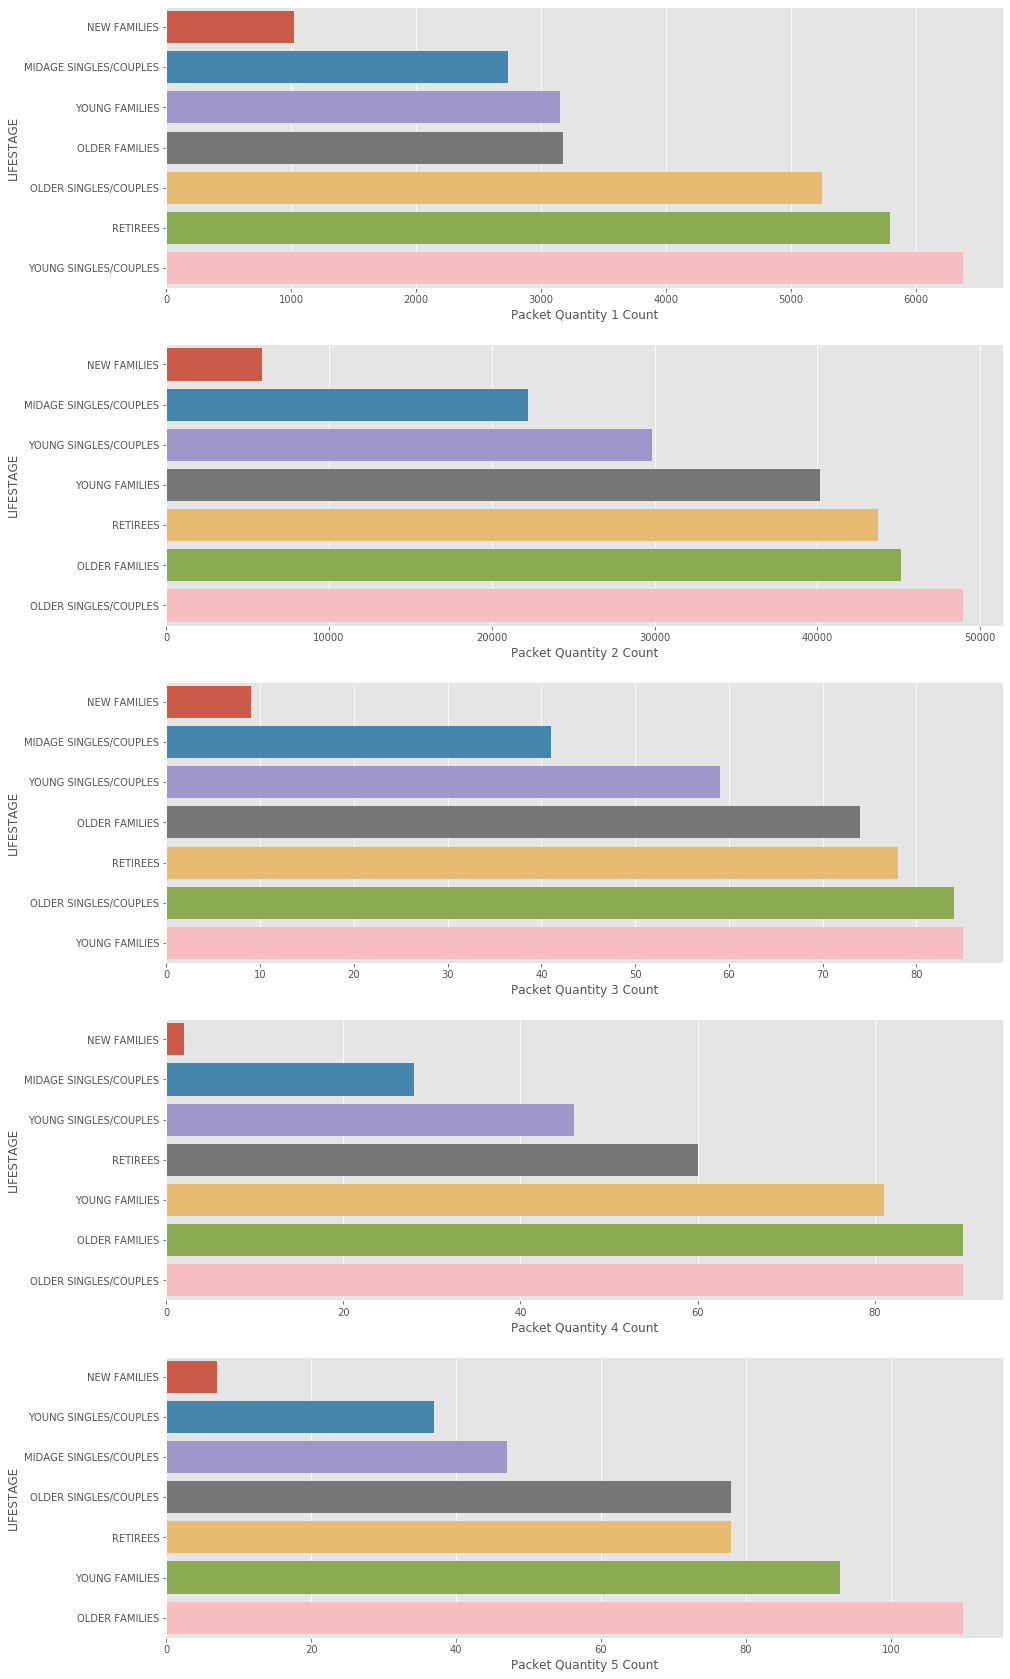

In [47]:
temp_df = df.groupby(by='PROD_QTY')

# Group1 (1 Packet)
group1_df = temp_df.get_group(1)
temp_group1 = group1_df.groupby(by='LIFESTAGE').count()
temp_group1.sort_values('DATE', inplace=True)
x_count_group1 = temp_group1['DATE']
y_lifestage_group1 = temp_group1.index

# Group2 (2 Packet)
group2_df = temp_df.get_group(2)
temp_group2 = group2_df.groupby(by='LIFESTAGE').count()
temp_group2.sort_values('DATE', inplace=True)
x_count_group2 = temp_group2['DATE']
y_lifestage_group2 = temp_group2.index

# Group3 (3 Packet)
group3_df = temp_df.get_group(3)
temp_group3 = group3_df.groupby(by='LIFESTAGE').count()
temp_group3.sort_values('DATE', inplace=True)
x_count_group3 = temp_group3['DATE']
y_lifestage_group3 = temp_group3.index

# Group4 (4 Packet)
group4_df = temp_df.get_group(4)
temp_group4 = group4_df.groupby(by='LIFESTAGE').count()
temp_group4.sort_values('DATE', inplace=True)
x_count_group4 = temp_group4['DATE']
y_lifestage_group4 = temp_group4.index

# Group5 (5 Packet)
group5_df = temp_df.get_group(5)
temp_group5 = group5_df.groupby(by='LIFESTAGE').count()
temp_group5.sort_values('DATE', inplace=True)
x_count_group5 = temp_group5['DATE']
y_lifestage_group5 = temp_group5.index


# Plot the graphs
fig1, ax1 =plt.subplots(nrows=5, ncols=1, figsize=(15, 30))

sns.barplot(x=x_count_group1, y=y_lifestage_group1, ax=ax1[0])
ax1[0].set(xlabel="Packet Quantity 1 Count")      

sns.barplot(x=x_count_group2, y=y_lifestage_group2, ax=ax1[1])
ax1[1].set(xlabel="Packet Quantity 2 Count")      

sns.barplot(x=x_count_group3, y=y_lifestage_group3, ax=ax1[2])
ax1[2].set(xlabel="Packet Quantity 3 Count") 

sns.barplot(x=x_count_group4, y=y_lifestage_group4, ax=ax1[3])
ax1[3].set(xlabel="Packet Quantity 4 Count") 

sns.barplot(x=x_count_group5, y=y_lifestage_group5, ax=ax1[4])
ax1[4].set(xlabel="Packet Quantity 5 Count") 

#save figure
plt.savefig('image9.png')

## Conclusion1 (Packet 1) :- 
#### Majority of persons that buy one packet are from the groups -> Old and Young (Singles/Couples), Retirees

## Conclusion2 (Packet 2) :-
#### Majority of persons that buy two packets are from the groups -> Older Singles/Couples and Families , Young Families, Retirees

## Conclusion3 (Packet 3) :-
#### Majority of persons that buy three packets are from the groups -> Young and Older Families, Older Single/Couple, Retirees

## Conclusion4 (Packet 4) :-
#### Majority of persons that buy four packets are from the groups -> Young and Older Families, Older Single/Couple

## Conclusion5 (Packet 5) :-
#### Majority of persons that buy five packets are from the groups -> Young and Older Families, Retirees

In [48]:
# <<<---- Most sold quantity by CATEGORY ---->>>

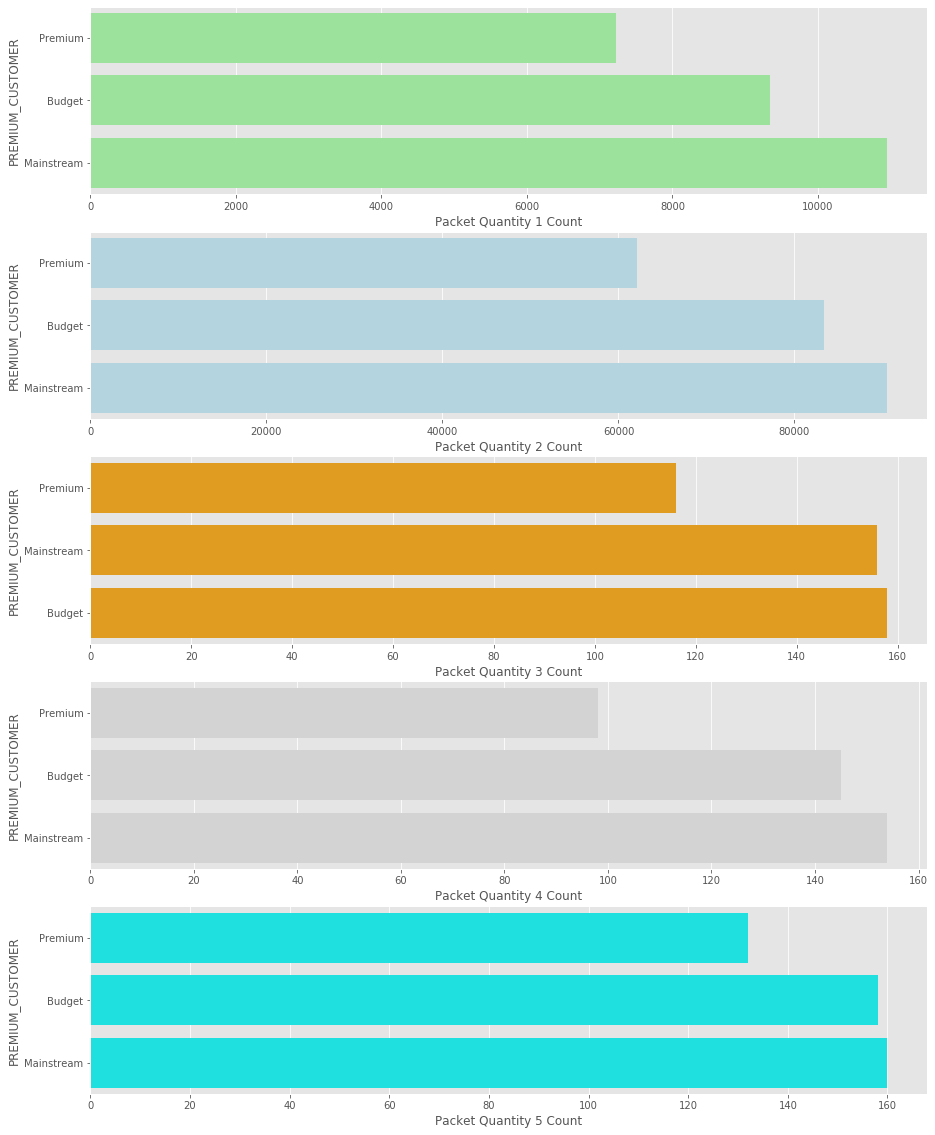

In [49]:
temp_df = df.groupby(by='PROD_QTY')

# Group1 (1 Packet)
group1_df = temp_df.get_group(1)
temp_group1 = group1_df.groupby(by='PREMIUM_CUSTOMER').count()
temp_group1.sort_values('DATE', inplace=True)
x_count_group1 = temp_group1['DATE']
y_category_group1 = temp_group1.index

# Group2 (2 Packet)
group2_df = temp_df.get_group(2)
temp_group2 = group2_df.groupby(by='PREMIUM_CUSTOMER').count()
temp_group2.sort_values('DATE', inplace=True)
x_count_group2 = temp_group2['DATE']
y_category_group2 = temp_group2.index

# Group3 (3 Packet)
group3_df = temp_df.get_group(3)
temp_group3 = group3_df.groupby(by='PREMIUM_CUSTOMER').count()
temp_group3.sort_values('DATE', inplace=True)
x_count_group3 = temp_group3['DATE']
y_category_group3 = temp_group3.index

# Group4 (4 Packet)
group4_df = temp_df.get_group(4)
temp_group4 = group4_df.groupby(by='PREMIUM_CUSTOMER').count()
temp_group4.sort_values('DATE', inplace=True)
x_count_group4 = temp_group4['DATE']
y_category_group4 = temp_group4.index

# Group5 (5 Packet)
group5_df = temp_df.get_group(5)
temp_group5 = group5_df.groupby(by='PREMIUM_CUSTOMER').count()
temp_group5.sort_values('DATE', inplace=True)
x_count_group5 = temp_group5['DATE']
y_category_group5 = temp_group5.index


# Plot the graphs
fig1, ax1 =plt.subplots(nrows=5, ncols=1, figsize=(15, 20))

sns.barplot(x=x_count_group1, y=y_category_group1, ax=ax1[0], color='lightgreen')
ax1[0].set(xlabel="Packet Quantity 1 Count")      

sns.barplot(x=x_count_group2, y=y_category_group2, ax=ax1[1], color='lightblue')
ax1[1].set(xlabel="Packet Quantity 2 Count")      

sns.barplot(x=x_count_group3, y=y_category_group3, ax=ax1[2], color='orange')
ax1[2].set(xlabel="Packet Quantity 3 Count") 

sns.barplot(x=x_count_group4, y=y_category_group4, ax=ax1[3], color='lightgrey')
ax1[3].set(xlabel="Packet Quantity 4 Count") 

sns.barplot(x=x_count_group5, y=y_category_group5, ax=ax1[4], color='cyan')
ax1[4].set(xlabel="Packet Quantity 5 Count") 

#save figure
plt.savefig('image10.png')

## Conclusion :- Premium Customer buys less Chips in every segment of packet quantity.

# Final Summary...

### 1. Near Christmas sales of Chips go high.

### 2. Most packet sold are of average weight.

### 3. Older people more likely to buy chips followed by Young Families.

### 4. Retirees and single/Couples more likely to buy chips.

### 5. In Budget category everyone love to buy chips except mainstream single/couples.

### 6. In Mainstream Young/Single couples and families and retirees more likely to buy chips.

### 7. In Premium category Older Single/Couples and retirees more likely to buy Chips!.

### 8. Customer's in every Lifestage in every Category are spending same money on average (ie. about 7 to 7.5 USD).

### 9. People mostly love to buy 2 packetes at a time.

### 10.(a) Majority of persons that buy one packet are from the groups -> Old and Young (Singles/Couples), Retirees.

### 10(b). Majority of persons that buy two packets are from the groups -> Older Singles/Couples and Families , Young Families, Retirees.

### 10(c). Majority of persons that buy three packets are from the groups -> Young and Older Families, Older Single/Couple, Retirees.

### 10(d). Majority of persons that buy four packets are from the groups -> Young and Older Families, Older Single/Couple.

### 10(e).  Majority of persons that buy five packets are from the groups -> Young and Older Families, Retirees.

### Basically the Customers that are old and have families buys 3 to 4 packets at a time and Singles/Couples buy 1 to 2 packets at a time.

### 11. Premium Customer seems to buy less Chips in every segment of packet quantity.